In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as mpl

In [2]:
df = pd.read_excel('./data/in/Data_QJE.xlsx', index_col=0)
df

,UR,PI,PIX,Ygap_hp,UR_hp,IV_rr,FF4,ONRUN2,ONRUN10,T2YF_hat,T10YF_hat,SW11969,sw21969,sw31969,sw41969,sw51969,sw61969,sw71969
date,,,,,,,,,,,,,,,,,,
1969.00,3.400000,3.87824,4.37492,1.626786,-0.673838,-0.184389,NaN,NaN,NaN,NaN,NaN,-4.043865,-3.056025,-0.266827,0.206453,1.069652,-6.484587,0.953679
1969.25,3.433333,5.08968,4.78988,1.138911,-0.747147,0.534632,NaN,NaN,NaN,NaN,NaN,-2.327891,3.727544,-1.408789,-1.482471,4.114670,0.047758,-2.901346
1969.50,3.566667,4.89840,4.61900,1.028050,-0.632793,0.521232,NaN,NaN,NaN,NaN,NaN,-2.074892,0.824506,0.230661,-2.352484,1.590937,-3.134040,-0.720579
1969.75,3.566667,4.62068,4.68544,-0.212718,-0.729216,0.153874,NaN,NaN,NaN,NaN,NaN,3.098452,3.934060,0.578693,-1.839008,3.408444,-0.722933,-0.152378
1970.00,4.166667,4.63992,4.37080,-1.101440,-0.234463,-0.578450,NaN,NaN,NaN,NaN,NaN,3.004395,1.655030,2.137430,0.947018,-1.706447,-4.317235,-0.723946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018.75,3.800000,1.32456,1.73120,0.056074,0.086323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019.00,3.866667,0.39472,1.04752,0.199568,0.310336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019.25,3.633333,2.36224,1.84668,0.079422,0.133423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
nL = 20
# varForce = 'UR_hp'
varForce = 'Ygap_hp'

In [4]:
# construct variables
df['vPia'] = df['PIX']
df['vPiL'] = 0.25*(df['vPia'].shift(1)+df['vPia'].shift(2)+df['vPia'].shift(3)+df['vPia'].shift(4))
df['vPiF'] = 0.25*(df['vPia'].shift(-1)+df['vPia'].shift(-2)+df['vPia'].shift(-3)+df['vPia'].shift(-4))
df['vXa'] = df[varForce]
df['vIV'] = df['IV_rr']
df.tail()

,UR,PI,PIX,Ygap_hp,UR_hp,IV_rr,FF4,ONRUN2,ONRUN10,T2YF_hat,...,sw31969,sw41969,sw51969,sw61969,sw71969,vPia,vPiL,vPiF,vXa,vIV
date,,,,,,,,,,,,,,,,,,,,,
2018.75,3.800000,1.32456,1.73120,0.056074,0.086323,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.73120,2.02450,1.57599,0.056074,NaN
2019.00,3.866667,0.39472,1.04752,0.199568,0.310336,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.04752,1.91808,NaN,0.199568,NaN
2019.25,3.633333,2.36224,1.84668,0.079422,0.133423,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.84668,1.61261,NaN,0.079422,NaN
2019.50,3.633333,1.47916,2.09188,-0.018589,0.256003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.09188,1.54678,NaN,-0.018589,NaN
2019.75,3.533333,1.54768,1.31788,-0.122324,0.278408,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.31788,1.67932,NaN,-0.122324,NaN


In [5]:
# get variables for estimation
Ydata = df[['vPia']]                # \pi_{t}
Xdata = df[['vPiL', 'vPiF', 'vXa']] # \pi_{t-1}, \pi_{t+1} x_{t}
Idata = df[['vIV']]                 # \xi_{t}

In [6]:
# get data matrices and sizes
mYdata, mXdata, mIdata = Ydata.values, Xdata.values, Idata.values
(n0, nY), (_, nX), (_, nZ) = mYdata.shape, mXdata.shape, mIdata.shape

In [7]:
# create an instrument matrix with nL lags
mZdata = np.zeros((n0, 0))
for l in range(nL+1):
    mZdata = np.column_stack((mZdata, np.roll(mIdata, l)))

In [8]:
# combine Y, X, Z data matrices and remove NaNs
mYXZdata = np.column_stack((mYdata, mXdata, mZdata))
nanXYZdata = np.isnan(mYXZdata).any(1)
mYXZ = mYXZdata[~nanXYZdata, :]
mY, mX, mZ = np.split(mYXZ, np.cumsum([nY, nX]), axis=1)

In [9]:
# demean variables
mYd = mY - mY.mean(0, keepdims=True)
mXd = mX - mX.mean(0, keepdims=True)
mZd = mZ - mZ.mean(0, keepdims=True)

In [10]:
# polynomial instrument matrix
vR = np.arange(0, nL+1)
mZdp = np.column_stack((np.sum(mZd, 1), np.sum(mZd*vR, 1), np.sum(mZd*vR**2, 1)))

In [11]:
# delta
delta = np.linalg.solve(mZdp.T@mX, mZdp.T@mY)
delta

array([[0.62866086],
       [0.42605755],
       [0.28286257]])

In [12]:
# intercept
delta0 = np.mean(mY, 0) - np.mean(mX, 0)@delta
delta0

array([-0.19041416])

In [13]:
# calculate residuals
mRdata = mYdata-mXdata@delta-delta0
mRdata[nanXYZdata] = np.nan
Rdata = pd.DataFrame(mRdata, index=Ydata.index, columns=['Res'])

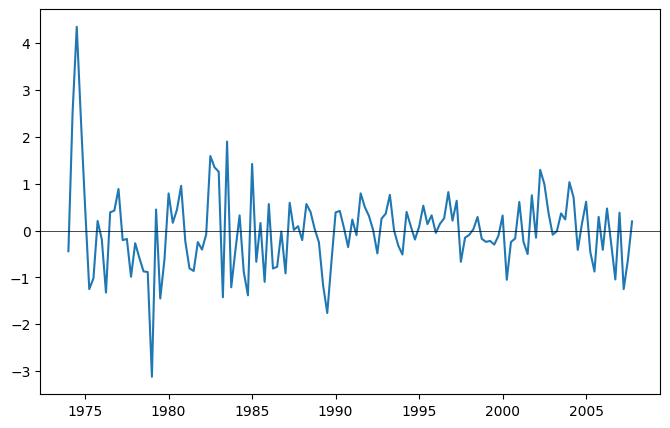

In [14]:
fig, ax = mpl.subplots(figsize=(8, 5))
ax.plot(Rdata.index, Rdata['Res'])
ax.axhline(y=0, lw=0.5, color='k')
mpl.show()